In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLarsIC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

# Predicting BARTHAG

In [2]:
cbb = pd.read_csv("Kaggle Datasets/cbb.csv")
cbb21 = pd.read_csv("Kaggle Datasets/cbb21.csv")
cbb.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017


In [3]:
cbb.columns

Index(['TEAM', 'CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB', 'POSTSEASON', 'SEED', 'YEAR'],
      dtype='object')

In [4]:
data = cbb[["EFG_O", "EFG_D","TOR","TORD", "ORB", "DRB", "FTR", "FTRD",
           "2P_O", "2P_D", "3P_O", "3P_D", "ADJ_T"]].values
target = cbb["BARTHAG"].values

model = LassoLarsIC(criterion="aic")

model.fit(data,target)

print(model.coef_)

[ 0.02946684 -0.0304741  -0.03705977  0.02038228  0.01462036 -0.00994642
  0.00241952 -0.00497243  0.         -0.00695018  0.          0.
  0.        ]


In [5]:
data = cbb[["EFG_O", "EFG_D", "TOR", "TORD", "ORB", "DRB", "FTR", "FTRD", "2P_D"]].values
target = cbb["BARTHAG"].values

linear_model = LinearRegression()
linear_model.fit(X = data, y = target)

cbb["predicted_BARTHAG"] = linear_model.predict(data)

print("MSE:", mean_squared_error(cbb["BARTHAG"].values, cbb["predicted_BARTHAG"].values),
     "r^2:", r2_score(cbb["BARTHAG"].values, cbb["predicted_BARTHAG"].values))

MSE: 0.014538782203080686 r^2: 0.7784876313084791


In [6]:
test_data_barthag = cbb21[["EFG_O", "EFG_D", "TOR", "TORD", "ORB", "DRB", "FTR", "FTRD", "2P_D"]].values
test_target_barthag = cbb21["BARTHAG"].values

cbb21["predicted_BARTHAG"] = linear_model.predict(test_data_barthag)

print("MSE:", mean_squared_error(cbb21["BARTHAG"].values, cbb21["predicted_BARTHAG"].values),
     "r^2:", r2_score(cbb21["BARTHAG"].values, cbb21["predicted_BARTHAG"].values))

MSE: 0.02776715044451665 r^2: 0.5847538771237473


In [7]:
cbb21[["TEAM", "BARTHAG", "predicted_BARTHAG"]].head()

,TEAM,BARTHAG,predicted_BARTHAG
0,Michigan,0.9521,0.953402
1,Baylor,0.9548,1.032003
2,Illinois,0.9539,0.928008
3,Gonzaga,0.9791,1.186994
4,Iowa,0.9491,0.953969


## Results

We wanted to use the statistics from the Kaggle `cbb` dataset, which contains compiled NCAA basketball team data from 2013-2019, to help predict `BARTHAG` rating, which is a college basketball team's chance or probability of beating an average DI team. Given that adjusted offence, `ADJOE`, and adjusted defense, `ADJDE`, influence `BARTHAG` directly, we eliminated these as potential predictors. Unsure of what other predictors would help the model efficiently yield the highest $r^2$ value, we used `sklearn`'s LassoLarsIC object to find what combination would produce the lowest Akaike Information Criterion, or AIC, which helped us find the best fit model, or the model that explains the greatest amount of variation in the response variable using the fewest possible explanatory variables.

From there, the best identified explanatory variables were `EFG_O`, `EFG_D`, `TOR`, `TORD`, `ORB`, `DRB`, `FTR`, `FTRD`, and `2P_D`. We used these predictors to fit a linear regression model to our dataset, from which we observed an $r^2$ value of 0.778. This value indicates that 77.8% of the variation in `BARTHAG` scores can be explained by our model, which is a decently high percentage and suggests a successful model.

After fitting a model to the 2013-2019 data, we decided to test it on the 2021 data, which was taken from this year's season. The reason we did this is that it we believed it would be a good evaluation of our model, as the values in this dataset are completely separate from those that we used to train, so we can better understand whether this model is truly a good predictor of BARTHAG scores.

The results from testing our model on this year's data yielded an $r^2$ value of 0.585, which means that just over half of the variation in 2021 BARTHAG ratings can be explained by our model. This indicates that our model might not be the best predictor of BARTHAG scores, as it does not extrapolate well beyond the training data. Future explorations, beyond the scope of this project, could focus on finding a better model for BARTHAG scores.

# Predicting Tournament Entry

In [8]:
cbb["in_postseason"] = 0
cbb.loc[cbb["POSTSEASON"].notna(), "in_postseason"] = 1

Classification accuracy: 0.9209775967413442


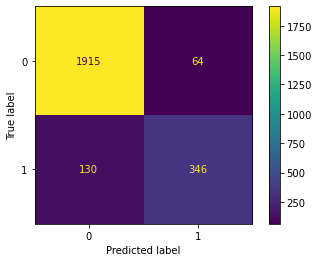

In [9]:
data = cbb[['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB']].values
target = cbb["in_postseason"].values

logistic_model = LogisticRegression(max_iter = 1000)
logistic_model.fit(X = data, y = target)
cbb["predicted_in_postseason"] = logistic_model.predict(data)

print("Classification accuracy:", logistic_model.score(data, target))
metrics.plot_confusion_matrix(logistic_model, data, target)

In [10]:
cbb21["in_postseason"] = 0
cbb21.loc[cbb21["SEED"].notna(), "in_postseason"] = 1

Classification accuracy: 0.9193083573487032


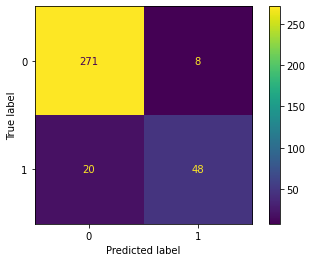

In [11]:
test_data = cbb21[['ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D',
       'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O',
       '3P_D', 'ADJ_T', 'WAB']].values
test_target = cbb21["in_postseason"].values

cbb21["predicted_tournament"] = logistic_model.predict(test_data)

cbb21["prob_tournament"] = logistic_model.predict_proba(test_data)[:,1]

print("Classification accuracy:", accuracy_score(test_target, logistic_model.predict(test_data)))
plot_confusion_matrix(logistic_model, test_data, test_target)

In [12]:
cbb21[(cbb21["TEAM"] == "Duke") | (cbb21["TEAM"] == "Belmont")]

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,predicted_BARTHAG,in_postseason,predicted_tournament,prob_tournament
258,Duke,ACC,24,13,115.1,97.1,0.8758,53.7,51.3,18.3,...,50.4,35.1,35.5,68.5,-1.8,NaN,0.632681,0,0,0.163342
346,Belmont,OVC,29,26,108.5,101.6,0.6786,56.3,49.3,16.6,...,48.2,34.7,34.0,71.1,-1.1,NaN,0.843017,0,1,0.605791


## Results

Using the `cbb` dataset, we created a binary categorial variable to denote whether or not a team made the NCAA tournament. We then trained a logistic regression model using the various statistics given in the dataset to predict tournament entry. Using our trained data, we had an accuracy score of 0.9209, which suggests that our model was successful in identifying the statistic of interest, at least among training data. 

We wanted to take our model a step further, and test it on data from the 2021 season, which resulted in an accuracy score of 0.9193, which suggests that our model remained accurate, even among new data.

However, upon closer inspection, we identified a limitation of our model, which is the fact that it does not take into account quality of opponent, which is an important criterion for the real selection committee who decides which teams make the tournament. For example, we were curious about what Duke's predicted probability of making the tournament was based on our model, and we found it to be 0.16 — very low, considering that we were only a few teams away from making the tournament. Comparing this with Belmont, who also did not make the tournament but who was not in the conversation at all, our model falsely identified them as a tournament team, with a probability of making the tournament of 0.61. The only explanation here would be that Belmont recorded better or equal in less meaningful games, allowing our model to believe that they were a better team than Duke, which was not true.

Overall, our model does a good job of predicting which teams make the tournament and which do not, but as we have pointed out, it is not perfect, and some form of "strength of schedule" would be needed to improve it further.